# Project - 1
# Exploratory Data Analysis - Moving Violations Issued in March 2022

In [50]:
#importing libraries

# import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Loading Data set

data = pd.read_csv("Moving_Violations_Issued_in_March_2022.csv")

**Understanding the Data**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102927 entries, 0 to 102926
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   OBJECTID                102927 non-null  int64  
 1   LOCATION                102927 non-null  object 
 2   XCOORD                  102346 non-null  float64
 3   YCOORD                  102346 non-null  float64
 4   ISSUE_DATE              102927 non-null  object 
 5   ISSUE_TIME              102927 non-null  int64  
 6   ISSUING_AGENCY_CODE     102927 non-null  int64  
 7   ISSUING_AGENCY_NAME     102927 non-null  object 
 8   ISSUING_AGENCY_SHORT    102927 non-null  object 
 9   VIOLATION_CODE          102927 non-null  object 
 10  VIOLATION_PROCESS_DESC  102927 non-null  object 
 11  PLATE_STATE             102927 non-null  object 
 12  ACCIDENT_INDICATOR      2945 non-null    object 
 13  DISPOSITION_CODE        102927 non-null  int64  
 14  DISPOSITION_TYPE    

In [5]:
# Loading first five rows from Dataset

data.head()

,OBJECTID,LOCATION,XCOORD,YCOORD,ISSUE_DATE,ISSUE_TIME,ISSUING_AGENCY_CODE,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,...,PENALTY_2,PENALTY_3,PENALTY_4,PENALTY_5,RP_MULT_OWNER_NO,BODY_STYLE,LATITUDE,LONGITUDE,MAR_ID,GIS_LAST_MOD_DTTM
0,34597548,I 395 SOUTHBOUND SW,NaN,NaN,2022/03/25 04:00:00+00,2221,1,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T059,...,0,0,0,0,0,NaN,NaN,NaN,NaN,2022/04/08 05:53:06+00
1,34597549,2330 GOOD HOPE RD SE,402270.450,133068.760,2022/03/05 05:00:00+00,1729,6,METROPOLITAN POLICE DPT-DISTRICT 6,MPD-6D,T333,...,0,0,0,0,0,NaN,38.865,-76.974,286908.0,2022/04/08 05:53:06+00
2,34597552,3001 CONN AVE NW,395285.080,140304.350,2022/03/03 05:00:00+00,1433,24,U.S. NATIONAL ZOOLOGICAL POLICE,NZP,T672,...,0,0,0,0,0,NaN,38.931,-77.054,293230.0,2022/04/08 05:53:06+00
3,34597554,1100 19 ST NW,396207.124,137337.436,2022/03/12 05:00:00+00,36,52,US. SECRET SERVICE UNIFORM DIVISION,USSS,T113,...,0,0,0,0,0,NaN,38.904,-77.044,-1996.0,2022/04/08 05:53:06+00
4,34597555,746 SHERIDAN ST NW,397825.131,140429.830,2022/03/14 04:00:00+00,327,4,METROPOLITAN POLICE DPT-DISTRICT 4,MPD-4D,T013,...,0,0,0,0,0,NaN,38.932,-77.025,-35558.0,2022/04/08 05:53:06+00


In [7]:
# Loading last five rows from Dataset

data.tail()

,OBJECTID,LOCATION,XCOORD,YCOORD,ISSUE_DATE,ISSUE_TIME,ISSUING_AGENCY_CODE,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,...,PENALTY_2,PENALTY_3,PENALTY_4,PENALTY_5,RP_MULT_OWNER_NO,BODY_STYLE,LATITUDE,LONGITUDE,MAR_ID,GIS_LAST_MOD_DTTM
102922,34756876,3700 BLK S DAKOTA AVE NE SE/B,402091.810,140837.570,2022/03/26 04:00:00+00,47,25,SPECIAL OPERATION DIV & TRAFFIC DIV,MPD-SOD,T120,...,0,0,0,0,0,NaN,38.935,-76.976,814989.0,2022/04/08 05:53:33+00
102923,34756877,2000 BLK BRANCH AVE SE S/B,403549.610,133044.630,2022/03/26 04:00:00+00,49,25,SPECIAL OPERATION DIV & TRAFFIC DIV,MPD-SOD,T119,...,0,0,0,0,0,NaN,38.865,-76.959,53111.0,2022/04/08 05:53:33+00
102924,34756878,3700 BLK SOUTHERN AVE SE SW/B,404133.540,132428.010,2022/03/26 04:00:00+00,51,25,SPECIAL OPERATION DIV & TRAFFIC DIV,MPD-SOD,T119,...,0,0,0,0,0,NaN,38.860,-76.952,31943.0,2022/04/08 05:53:33+00
102925,34756879,SUITLAND PKWY W/B @ STANTON RD SE,401449.343,131721.086,2022/03/26 04:00:00+00,51,25,SPECIAL OPERATION DIV & TRAFFIC DIV,MPD-SOD,T119,...,0,0,0,0,0,NaN,38.853,-76.983,901568.0,2022/04/08 05:53:33+00
102926,34756880,2200 BLK K ST NW W/B,395664.920,137186.890,2022/03/26 04:00:00+00,52,25,SPECIAL OPERATION DIV & TRAFFIC DIV,MPD-SOD,T121,...,0,0,0,0,0,NaN,38.903,-77.050,805065.0,2022/04/08 05:53:33+00


In [8]:
# Dimensions of Dataset

data.shape

(102927, 29)

In [9]:
data.describe()

,OBJECTID,XCOORD,YCOORD,ISSUE_TIME,ISSUING_AGENCY_CODE,DISPOSITION_CODE,FINE_AMOUNT,TOTAL_PAID,PENALTY_1,PENALTY_2,PENALTY_3,PENALTY_4,PENALTY_5,RP_MULT_OWNER_NO,BODY_STYLE,LATITUDE,LONGITUDE,MAR_ID
count,1.029270e+05,102346.000000,102346.000000,102927.000000,102927.000000,102927.000000,102927.000000,102927.000000,102927.000000,102927.0,102927.0,102927.0,102927.0,1.029270e+05,0.0,102346.000000,102346.000000,100769.000000
mean,3.469321e+07,399775.980838,137514.352601,1301.078871,24.474268,0.047072,109.317866,17.438136,0.071993,0.0,0.0,0.0,0.0,1.703830e+07,NaN,38.905515,-77.002590,589357.270768
std,4.626168e+04,3905.981176,4066.451301,519.739701,3.525948,1.584147,50.229566,42.066752,4.099799,0.0,0.0,0.0,0.0,1.256887e+08,NaN,0.036626,0.045038,346055.791662
min,3.459755e+07,390513.250000,128092.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,NaN,38.821000,-77.109000,-37627.000000
25%,3.464008e+07,397107.484000,134663.600000,958.000000,25.000000,0.000000,100.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,NaN,38.880000,-77.033000,278456.000000
50%,3.470542e+07,399732.210000,137763.400000,1322.000000,25.000000,0.000000,100.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,NaN,38.908000,-77.003000,805065.000000
75%,3.473115e+07,402692.750000,140837.570000,1645.000000,25.000000,0.000000,100.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,NaN,38.935000,-76.969000,901787.000000
max,3.475688e+07,407514.303000,146788.570000,2359.000000,77.000000,111.000000,1000.000000,500.000000,500.000000,0.0,0.0,0.0,0.0,9.505720e+08,NaN,38.989000,-76.913000,913908.000000


# Data Cleaning

In [10]:
# Retrieving the total number of unique va;ues of each variable

data.nunique()

OBJECTID                  102927
LOCATION                    1592
XCOORD                      1069
YCOORD                      1071
ISSUE_DATE                    30
ISSUE_TIME                  1440
ISSUING_AGENCY_CODE           22
ISSUING_AGENCY_NAME           22
ISSUING_AGENCY_SHORT          22
VIOLATION_CODE               138
VIOLATION_PROCESS_DESC       138
PLATE_STATE                   44
ACCIDENT_INDICATOR             2
DISPOSITION_CODE              13
DISPOSITION_TYPE               5
DISPOSITION_DATE              16
FINE_AMOUNT                   18
TOTAL_PAID                    16
PENALTY_1                      9
PENALTY_2                      1
PENALTY_3                      1
PENALTY_4                      1
PENALTY_5                      1
RP_MULT_OWNER_NO            1536
BODY_STYLE                     0
LATITUDE                     148
LONGITUDE                    180
MAR_ID                      1074
GIS_LAST_MOD_DTTM             21
dtype: int64

In [19]:
# Dropping unwanted variables to make the data clear

new_Data = data.drop(['ISSUE_TIME','PENALTY_1','PENALTY_2','PENALTY_3','PENALTY_4','PENALTY_5','BODY_STYLE'], axis=1)

In [20]:
new_Data.shape

(102927, 22)

In [14]:
# Checking if there are any Null values present in the first Dataset

data.isnull().sum()

OBJECTID                       0
LOCATION                       0
XCOORD                       581
YCOORD                       581
ISSUE_DATE                     0
ISSUE_TIME                     0
ISSUING_AGENCY_CODE            0
ISSUING_AGENCY_NAME            0
ISSUING_AGENCY_SHORT           0
VIOLATION_CODE                 0
VIOLATION_PROCESS_DESC         0
PLATE_STATE                    0
ACCIDENT_INDICATOR         99982
DISPOSITION_CODE               0
DISPOSITION_TYPE               0
DISPOSITION_DATE          102732
FINE_AMOUNT                    0
TOTAL_PAID                     0
PENALTY_1                      0
PENALTY_2                      0
PENALTY_3                      0
PENALTY_4                      0
PENALTY_5                      0
RP_MULT_OWNER_NO               0
BODY_STYLE                102927
LATITUDE                     581
LONGITUDE                    581
MAR_ID                      2158
GIS_LAST_MOD_DTTM              0
dtype: int64

In [21]:
# Checking if there are any Null values present in the new Dataset

new_Data.isnull().sum()

OBJECTID                       0
LOCATION                       0
XCOORD                       581
YCOORD                       581
ISSUE_DATE                     0
ISSUING_AGENCY_CODE            0
ISSUING_AGENCY_NAME            0
ISSUING_AGENCY_SHORT           0
VIOLATION_CODE                 0
VIOLATION_PROCESS_DESC         0
PLATE_STATE                    0
ACCIDENT_INDICATOR         99982
DISPOSITION_CODE               0
DISPOSITION_TYPE               0
DISPOSITION_DATE          102732
FINE_AMOUNT                    0
TOTAL_PAID                     0
RP_MULT_OWNER_NO               0
LATITUDE                     581
LONGITUDE                    581
MAR_ID                      2158
GIS_LAST_MOD_DTTM              0
dtype: int64

In [22]:
# After viewing the values and total number of numbers the below variables are 
# dropped from the above dataset depending upon the variable's use.

new_Data = new_Data.drop(['DISPOSITION_CODE','DISPOSITION_TYPE','DISPOSITION_DATE','FINE_AMOUNT','TOTAL_PAID','RP_MULT_OWNER_NO'], axis=1)

In [23]:
new_Data.shape

(102927, 16)

In [24]:
new_Data.head()

,OBJECTID,LOCATION,XCOORD,YCOORD,ISSUE_DATE,ISSUING_AGENCY_CODE,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,VIOLATION_PROCESS_DESC,PLATE_STATE,ACCIDENT_INDICATOR,LATITUDE,LONGITUDE,MAR_ID,GIS_LAST_MOD_DTTM
0,34597548,I 395 SOUTHBOUND SW,NaN,NaN,2022/03/25 04:00:00+00,1,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T059,CHANGE LANES WITHOUT CAUTION,OH,Y,NaN,NaN,NaN,2022/04/08 05:53:06+00
1,34597549,2330 GOOD HOPE RD SE,402270.450,133068.760,2022/03/05 05:00:00+00,6,METROPOLITAN POLICE DPT-DISTRICT 6,MPD-6D,T333,FAIL TO DISPLAY PROOF OF VEHICLE INSURANCE,VA,N,38.865,-76.974,286908.0,2022/04/08 05:53:06+00
2,34597552,3001 CONN AVE NW,395285.080,140304.350,2022/03/03 05:00:00+00,24,U.S. NATIONAL ZOOLOGICAL POLICE,NZP,T672,FAIL TO DISPLAY CURRENT TAGS,VA,N,38.931,-77.054,293230.0,2022/04/08 05:53:06+00
3,34597554,1100 19 ST NW,396207.124,137337.436,2022/03/12 05:00:00+00,52,US. SECRET SERVICE UNIFORM DIVISION,USSS,T113,FAIL TO STOP PER REGULATIONS FACING RED SIGNAL,VA,N,38.904,-77.044,-1996.0,2022/04/08 05:53:06+00
4,34597555,746 SHERIDAN ST NW,397825.131,140429.830,2022/03/14 04:00:00+00,4,METROPOLITAN POLICE DPT-DISTRICT 4,MPD-4D,T013,FAIL TO PAY ATTENTION WHILE OPERATING A VEHICLE,ME,Y,38.932,-77.025,-35558.0,2022/04/08 05:53:06+00


In [25]:
new_Data.tail()

,OBJECTID,LOCATION,XCOORD,YCOORD,ISSUE_DATE,ISSUING_AGENCY_CODE,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,VIOLATION_PROCESS_DESC,PLATE_STATE,ACCIDENT_INDICATOR,LATITUDE,LONGITUDE,MAR_ID,GIS_LAST_MOD_DTTM
102922,34756876,3700 BLK S DAKOTA AVE NE SE/B,402091.810,140837.570,2022/03/26 04:00:00+00,25,SPECIAL OPERATION DIV & TRAFFIC DIV,MPD-SOD,T120,SPEED 16-20 MPH OVER THE SPEED LIMIT,,NaN,38.935,-76.976,814989.0,2022/04/08 05:53:33+00
102923,34756877,2000 BLK BRANCH AVE SE S/B,403549.610,133044.630,2022/03/26 04:00:00+00,25,SPECIAL OPERATION DIV & TRAFFIC DIV,MPD-SOD,T119,SPEED 11-15 MPH OVER THE SPEED LIMIT,,NaN,38.865,-76.959,53111.0,2022/04/08 05:53:33+00
102924,34756878,3700 BLK SOUTHERN AVE SE SW/B,404133.540,132428.010,2022/03/26 04:00:00+00,25,SPECIAL OPERATION DIV & TRAFFIC DIV,MPD-SOD,T119,SPEED 11-15 MPH OVER THE SPEED LIMIT,,NaN,38.860,-76.952,31943.0,2022/04/08 05:53:33+00
102925,34756879,SUITLAND PKWY W/B @ STANTON RD SE,401449.343,131721.086,2022/03/26 04:00:00+00,25,SPECIAL OPERATION DIV & TRAFFIC DIV,MPD-SOD,T119,SPEED 11-15 MPH OVER THE SPEED LIMIT,,NaN,38.853,-76.983,901568.0,2022/04/08 05:53:33+00
102926,34756880,2200 BLK K ST NW W/B,395664.920,137186.890,2022/03/26 04:00:00+00,25,SPECIAL OPERATION DIV & TRAFFIC DIV,MPD-SOD,T121,SPEED 21-25 MPH OVER THE SPEED LIMIT,,NaN,38.903,-77.050,805065.0,2022/04/08 05:53:33+00


In [30]:
new_Data.nunique()

OBJECTID                  102927
LOCATION                    1592
XCOORD                      1069
YCOORD                      1071
ISSUE_DATE                    30
ISSUING_AGENCY_CODE           22
ISSUING_AGENCY_NAME           22
ISSUING_AGENCY_SHORT          22
VIOLATION_CODE               138
VIOLATION_PROCESS_DESC       138
PLATE_STATE                   44
ACCIDENT_INDICATOR             2
LATITUDE                     148
LONGITUDE                    180
MAR_ID                      1074
GIS_LAST_MOD_DTTM             21
dtype: int64

In [26]:
new_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102927 entries, 0 to 102926
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   OBJECTID                102927 non-null  int64  
 1   LOCATION                102927 non-null  object 
 2   XCOORD                  102346 non-null  float64
 3   YCOORD                  102346 non-null  float64
 4   ISSUE_DATE              102927 non-null  object 
 5   ISSUING_AGENCY_CODE     102927 non-null  int64  
 6   ISSUING_AGENCY_NAME     102927 non-null  object 
 7   ISSUING_AGENCY_SHORT    102927 non-null  object 
 8   VIOLATION_CODE          102927 non-null  object 
 9   VIOLATION_PROCESS_DESC  102927 non-null  object 
 10  PLATE_STATE             102927 non-null  object 
 11  ACCIDENT_INDICATOR      2945 non-null    object 
 12  LATITUDE                102346 non-null  float64
 13  LONGITUDE               102346 non-null  float64
 14  MAR_ID              

# Relational Analysis

As the dataset is free from unwanted variables and data after data cleaning, the relational analysis is performed with the appropriate variables.

In [27]:
correlation = new_Data.corr()

<AxesSubplot:>

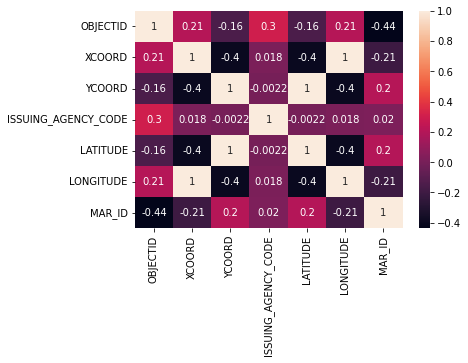

In [28]:
#implementing the Heatmap

sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns,annot=True)

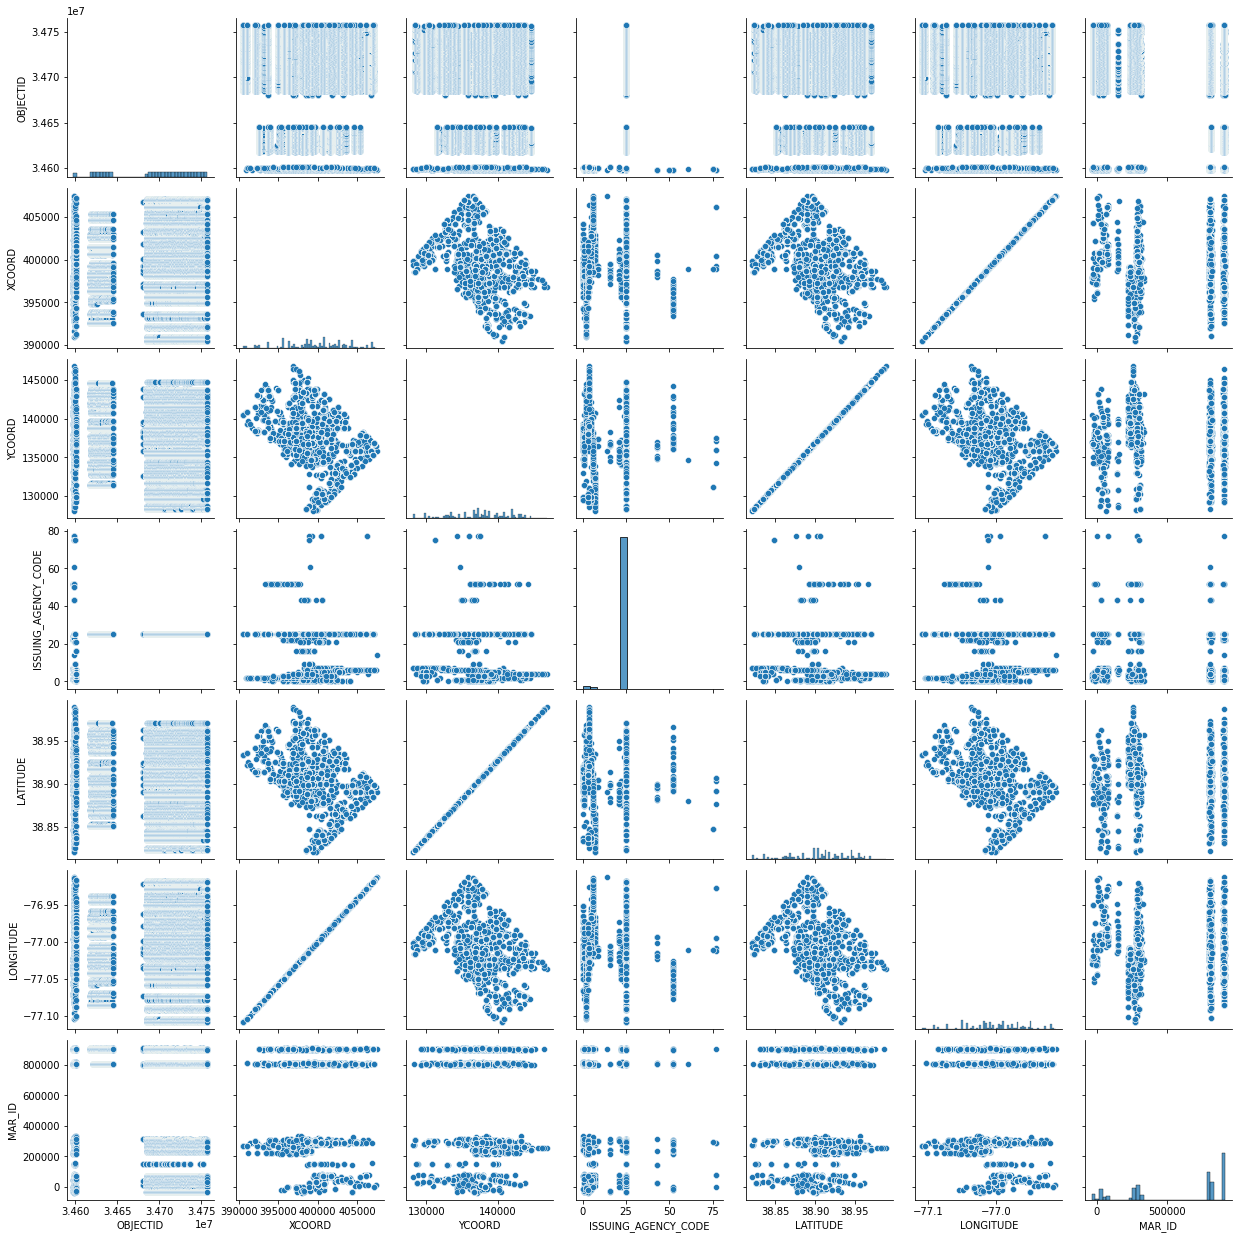

In [29]:
# Implementing the pair plot : used for two variables to determine relation

sns.pairplot(new_Data)

In [46]:
# Count of occurance of each value in the following variable

new_Data['ISSUING_AGENCY_SHORT'].value_counts()

MPD-SOD      100026
MPD-3D          623
MPD-5D          493
MPD-1D          317
MPD-2D          315
MPD-6D          314
MPD-4D          204
NO AGENCY       197
MPD-7D          112
USPP             81
USCP             74
USSS             53
DCTC             41
MPD-RC           22
MPD-OC           17
FBI              14
DIA              10
DCHA              6
FPS               4
NZP               2
MPD-PRTY          1
MPD-YD            1
Name: ISSUING_AGENCY_SHORT, dtype: int64

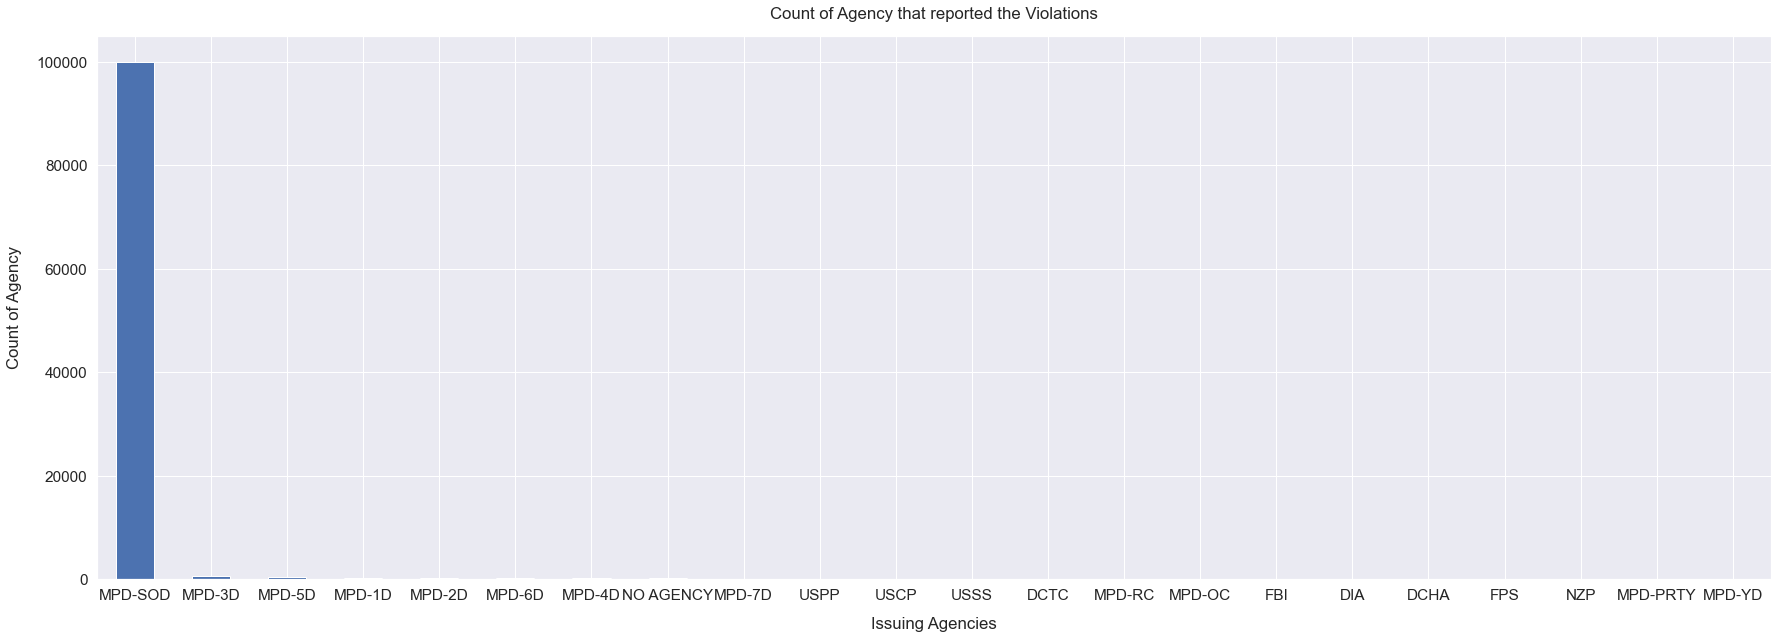

In [55]:
# Implementing the Bar graph to determine the relation between two variables with it's values and it's count of occurence

sns.set(font_scale=1.4)

new_Data['ISSUING_AGENCY_SHORT'].value_counts().plot(kind='bar', figsize=(30, 10), rot=0);

plt.xlabel("Issuing Agencies", labelpad=14)
plt.ylabel("Count of Agency", labelpad=14)
plt.title("Count of Agency that reported the Violations", y=1.02);


From the above Visuals, it can be concluded that the Agency called "MPD-SOD" has highest no occurence in the violations issued.

In [90]:
count = new_Data['ACCIDENT_INDICATOR'].value_counts()

<AxesSubplot:xlabel='Accident Indicator', ylabel='ACCIDENT_INDICATOR'>

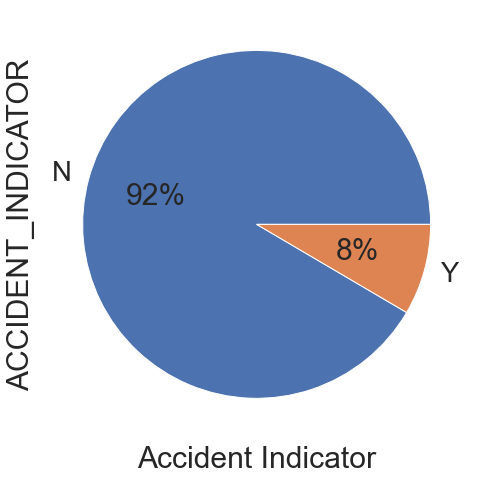

In [95]:
# Creating Pie chart to represent the percentage of accident indicator

fig = plt.figure(figsize =(10, 8))

plt.xlabel("Accident Indicator")



count.plot(kind='pie',autopct='%.0f%%')

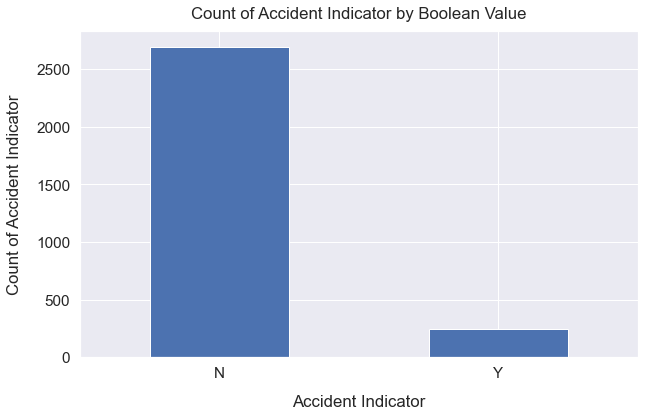

In [59]:
new_Data['ACCIDENT_INDICATOR'].value_counts().plot(kind='bar', figsize=(10, 6), rot=0);

plt.xlabel("Accident Indicator", labelpad=14)
plt.ylabel("Count of Accident Indicator", labelpad=14)
plt.title("Count of Accident Indicator by Boolean Value", y=1.02);

From the above visuals and values, the accident indicator replicates that there are less chances of accident occurence with respective of the moving violations issued by the Agencies.

In [99]:
count_1 = new_Data['VIOLATION_PROCESS_DESC'].value_counts().head()

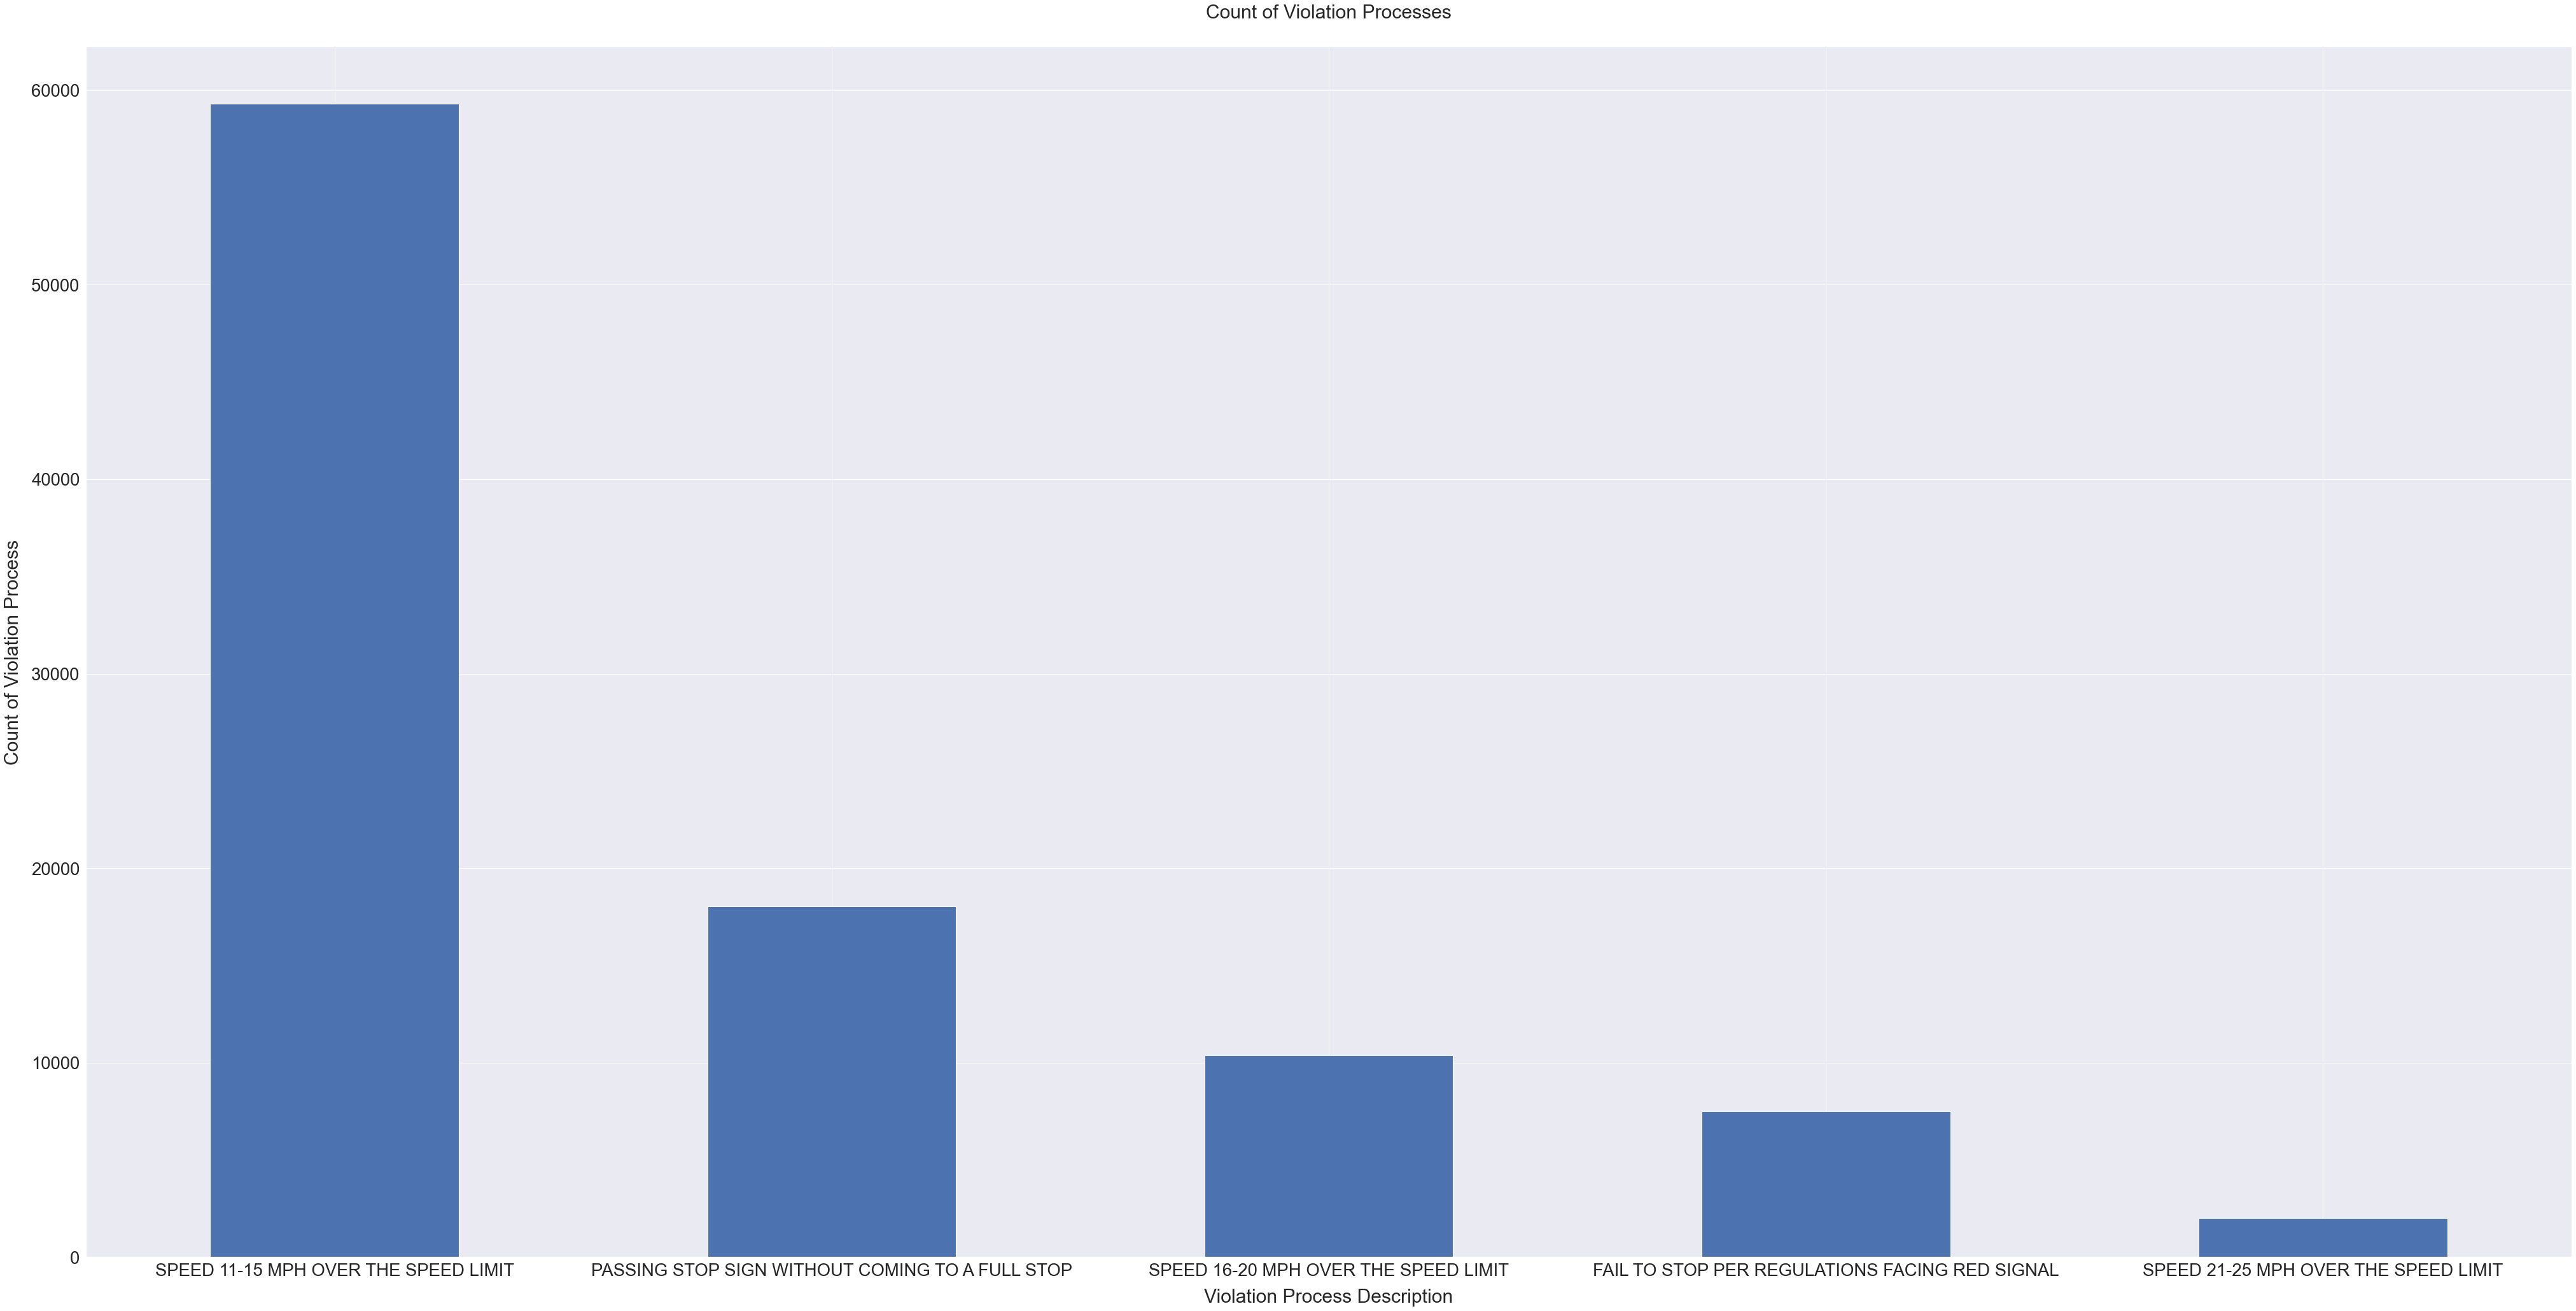

In [89]:
new_Data['VIOLATION_PROCESS_DESC'].value_counts(ascending=False).head().plot(kind='bar', figsize=(70, 35), rot=0);

sns.set(font_scale=2.5)

plt.xlabel("Violation Process Description", labelpad=14)
plt.ylabel("Count of Violation Process", labelpad=14)
plt.title("Count of Violation Processes", y=1.02);

<AxesSubplot:xlabel='Accident Indicator', ylabel='VIOLATION_PROCESS_DESC'>

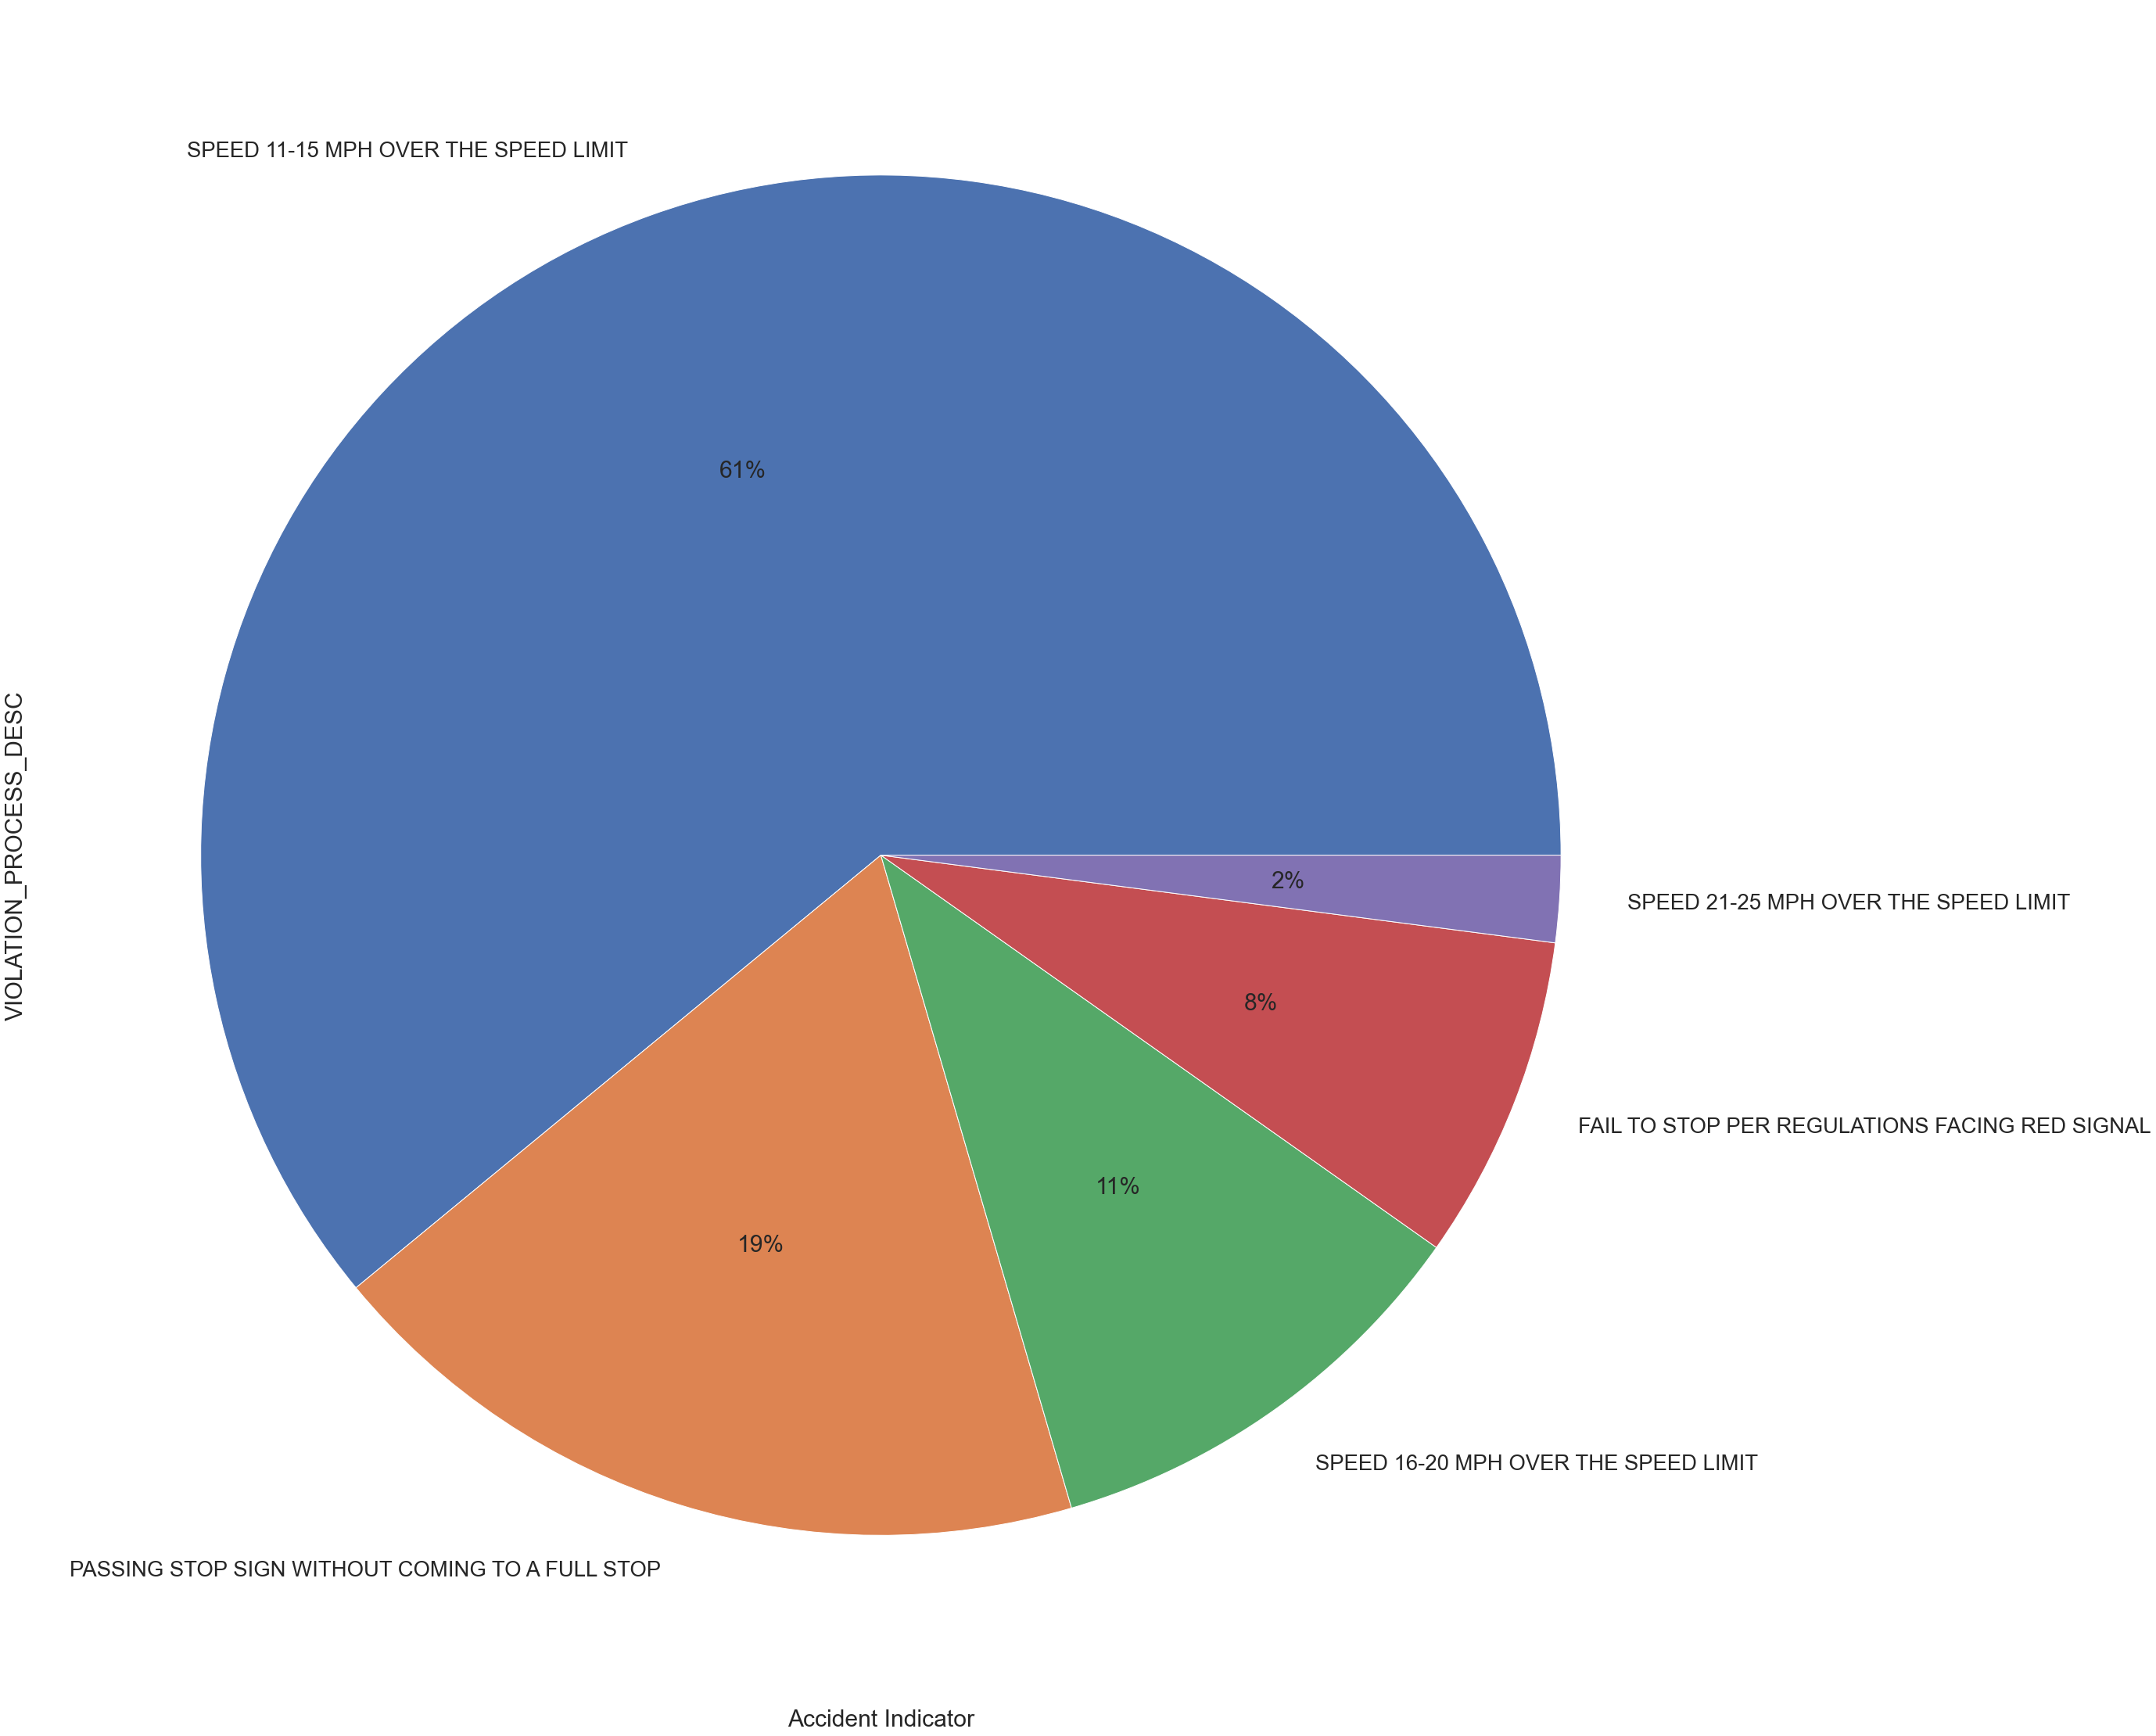

In [100]:
fig = plt.figure(figsize =(100, 40))

plt.xlabel("Accident Indicator")



count_1.plot(kind='pie',autopct='%.0f%%')

From the above visuals, it can be concluded that, the highest number of violations issued due to the "Speed 11-15 MPH Over the speed limit"